<a href="https://colab.research.google.com/github/hvr2026/CMPE-255-Assignment-2-LOW-CODE-ASSIGNMENTS-PART-2---pycaret-low-code-tasks/blob/main/MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 573.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Th

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
import pandas as pd

In [13]:
data = pd.read_csv('/content/synthetic_wine_quality_binned.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,12.259557,0.701330,0.020552,3.190984,0.059025,43.611198,163.080110,0.992304,3.510111,1.629967,11.735372,4
1,9.522179,0.063171,0.402676,4.645010,0.032037,32.406960,31.042216,1.002056,3.349997,1.428223,14.953917,4
2,13.995746,1.176356,0.043064,9.951078,0.047808,35.617432,57.221840,0.996506,3.324375,1.839757,14.878270,4
3,14.123633,1.198437,0.482596,7.340443,0.048805,46.612834,58.908134,1.003307,3.365472,0.493045,11.903703,4
4,13.980543,1.378994,0.274073,8.031616,0.059838,48.028289,110.227759,0.992942,3.754778,1.122334,14.786210,4


In [14]:
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 101)

,Description,Value
0,Session id,101
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(2000, 12)"
4,Transformed data shape,"(2000, 12)"
5,Transformed train set shape,"(1400, 12)"
6,Transformed test set shape,"(600, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [15]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [16]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [24]:
exp.setup(data, target = 'quality', session_id = 206)

,Description,Value
0,Session id,206
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(2000, 12)"
4,Transformed data shape,"(2000, 12)"
5,Transformed train set shape,"(1400, 12)"
6,Transformed test set shape,"(600, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [21]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9779,0.0000,0.9779,0.9681,0.9728,0.4006,0.4244,0.9450
knn,K Neighbors Classifier,0.9757,0.0846,0.9757,0.9528,0.9640,0.0495,0.0574,0.0740
nb,Naive Bayes,0.9757,0.0998,0.9757,0.9617,0.9686,0.2837,0.3091,0.0410
lightgbm,Light Gradient Boosting Machine,0.9757,0.0999,0.9757,0.9594,0.9671,0.2031,0.2341,1.3820
catboost,CatBoost Classifier,0.9757,0.0989,0.9757,0.9541,0.9648,0.0912,0.1085,11.9960
ridge,Ridge Classifier,0.9750,0.0000,0.9750,0.9506,0.9627,0.0000,0.0000,0.0260
rf,Random Forest Classifier,0.9750,0.0987,0.9750,0.9520,0.9634,0.0324,0.0344,0.2800
lda,Linear Discriminant Analysis,0.9750,0.0000,0.9750,0.9547,0.9648,0.1196,0.1393,0.0260
et,Extra Trees Classifier,0.9750,0.0993,0.9750,0.9506,0.9627,0.0000,0.0000,0.1690
dummy,Dummy Classifier,0.9750,0.0500,0.9750,0.9506,0.9627,0.0000,0.0000,0.0220


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [25]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9786,0.0000,0.9786,0.9691,0.9736,0.4345,0.4552,0.4000
nb,Naive Bayes,0.9786,0.0996,0.9786,0.9683,0.9728,0.4304,0.4681,0.0240
lightgbm,Light Gradient Boosting Machine,0.9757,0.0992,0.9757,0.9589,0.9671,0.2232,0.2530,1.3340
ridge,Ridge Classifier,0.9750,0.0000,0.9750,0.9506,0.9627,0.0000,0.0000,0.0290
knn,K Neighbors Classifier,0.9750,0.0949,0.9750,0.9513,0.9630,0.0243,0.0282,0.0400
rf,Random Forest Classifier,0.9750,0.0996,0.9750,0.9527,0.9637,0.0518,0.0589,0.2660
lda,Linear Discriminant Analysis,0.9750,0.0000,0.9750,0.9540,0.9644,0.1013,0.1249,0.0250
et,Extra Trees Classifier,0.9750,0.1000,0.9750,0.9506,0.9627,0.0000,0.0000,0.1570
catboost,CatBoost Classifier,0.9750,0.1000,0.9750,0.9554,0.9651,0.1412,0.1610,12.1810
dummy,Dummy Classifier,0.9750,0.0500,0.9750,0.9506,0.9627,0.0000,0.0000,0.0240


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=206, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

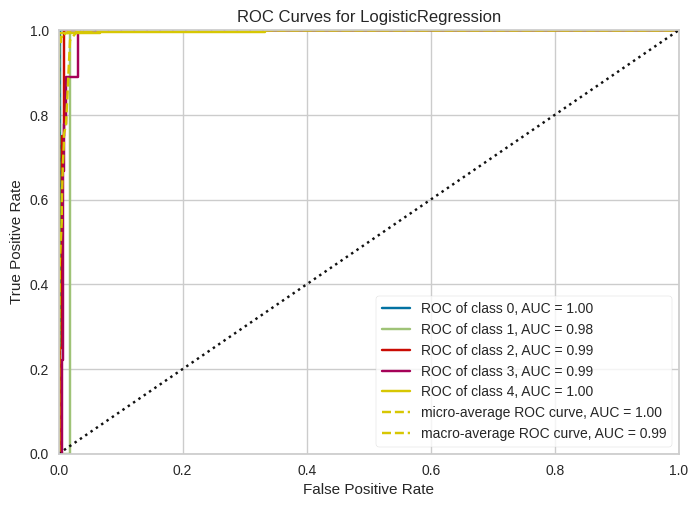

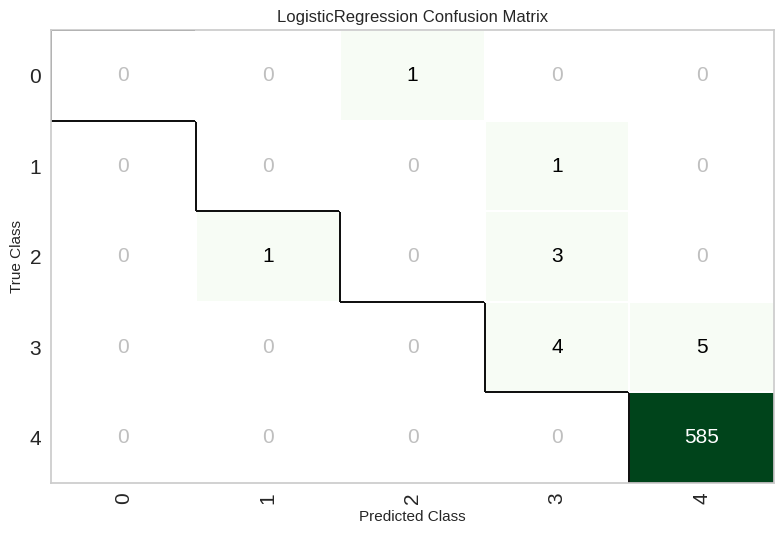

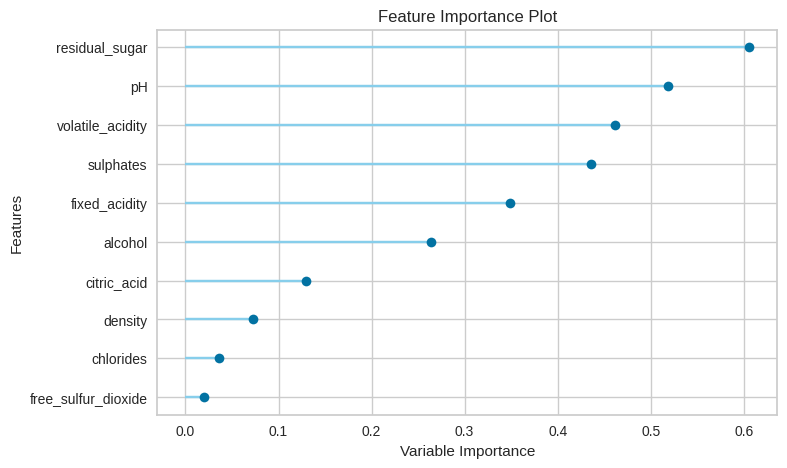

In [26]:
plot_model(best, plot='auc')
plot_model(best, plot='confusion_matrix')
plot_model(best, plot='feature')

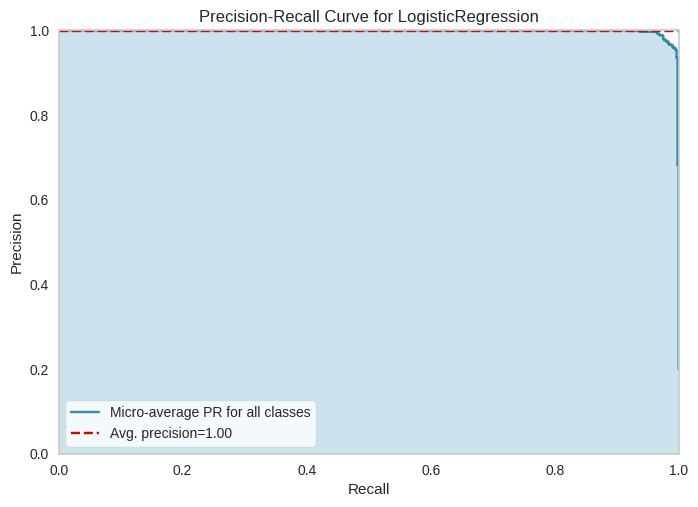

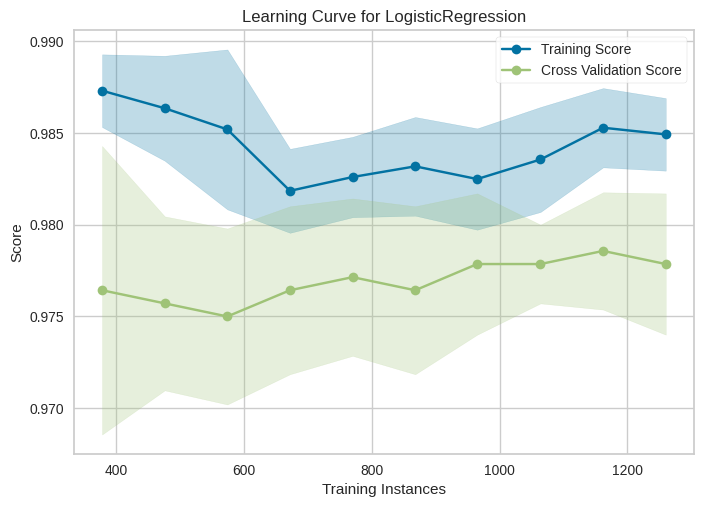

In [ ]:
# Precision-Recall Curve
plot_model(best, plot='pr')



# Learning Curve
plot_model(best, plot='learning')

# Validation Curve
plot_model(best, plot='vc')


In [30]:

testset_predictions = predict_model(best)
testset_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9817,0.9981,0.9817,0.9742,0.9779,0.5532,0.5651


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
233,5.311341,0.105444,0.328585,5.894901,0.044516,38.408497,14.686101,0.996956,3.561212,1.301854,13.595276,4,4,1.0000
46,9.813441,0.334422,0.553422,6.394875,0.059718,11.549972,70.581841,1.001688,2.846033,1.514178,14.888417,4,4,1.0000
712,10.541780,0.910300,0.346955,8.804369,0.040354,40.377155,137.949951,0.993016,2.835711,0.552262,13.268387,4,4,1.0000
60,13.289155,0.955778,0.097042,2.370054,0.042661,2.897983,58.404171,0.995495,3.124875,0.403329,12.828961,4,4,0.9994
902,8.046138,0.188862,0.781824,7.422943,0.032640,53.831623,55.269859,0.994332,3.181872,1.144383,12.057414,4,4,1.0000


In [34]:
new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,12.259557,0.701330,0.020552,3.190984,0.059025,43.611198,163.080110,0.992304,3.510111,1.629967,11.735372
1,9.522179,0.063171,0.402676,4.645010,0.032037,32.406960,31.042216,1.002056,3.349997,1.428223,14.953917
2,13.995746,1.176356,0.043064,9.951078,0.047808,35.617432,57.221840,0.996506,3.324375,1.839757,14.878270
3,14.123633,1.198437,0.482596,7.340443,0.048805,46.612834,58.908134,1.003307,3.365472,0.493045,11.903703
4,13.980543,1.378994,0.274073,8.031616,0.059838,48.028289,110.227759,0.992942,3.754778,1.122334,14.786210


In [35]:

new_predictions = predict_model(best, data = new_data)
new_predictions.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,12.259557,0.701330,0.020552,3.190984,0.059025,43.611198,163.080109,0.992304,3.510111,1.629967,11.735373,4,1.0
1,9.522180,0.063171,0.402676,4.645010,0.032037,32.406960,31.042217,1.002056,3.349998,1.428223,14.953917,4,1.0
2,13.995746,1.176356,0.043064,9.951078,0.047808,35.617432,57.221840,0.996506,3.324375,1.839757,14.878270,4,1.0
3,14.123633,1.198437,0.482596,7.340443,0.048805,46.612835,58.908134,1.003307,3.365472,0.493045,11.903704,4,1.0
4,13.980543,1.378994,0.274073,8.031616,0.059838,48.028290,110.227760,0.992942,3.754778,1.122334,14.786210,4,1.0


In [36]:

save_model(best, 'pipeline_two')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed_acidity',
                                              'volatile_acidity', 'citric_acid',
                                              'residual_sugar', 'chlorides',
                                              'free_sulfur_dioxide',
                                              'total_sulfur_dioxide', 'density',
                                              'pH', 'sulphates', 'alcohol'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                                               fill_value=None,
                           